### Test case: Weather delay (ic combination with resource dependencies)

Runs a simulation with two vessels: Both have to wait under certain - but different - weather (Hs) conditions. Vessel 2 stops earlier, leaving vessel 1 to finish the job.


#### Import libraries

In [1]:
import networkx as nx
import datetime as dt
import matplotlib.pyplot as plt

from openclsim.plot import get_gantt_chart
from openclsim.plot.graph_dependencies import DependencyGraph
from openclsim.plot.critical_path_log import CpLog

from scenario_weather import getActivitiesAndObjects, make_meteo_df 


#### Run the simulation

In [2]:
act, obj = getActivitiesAndObjects()

#### Plot the Gantt chart and weather

Condition on Hs

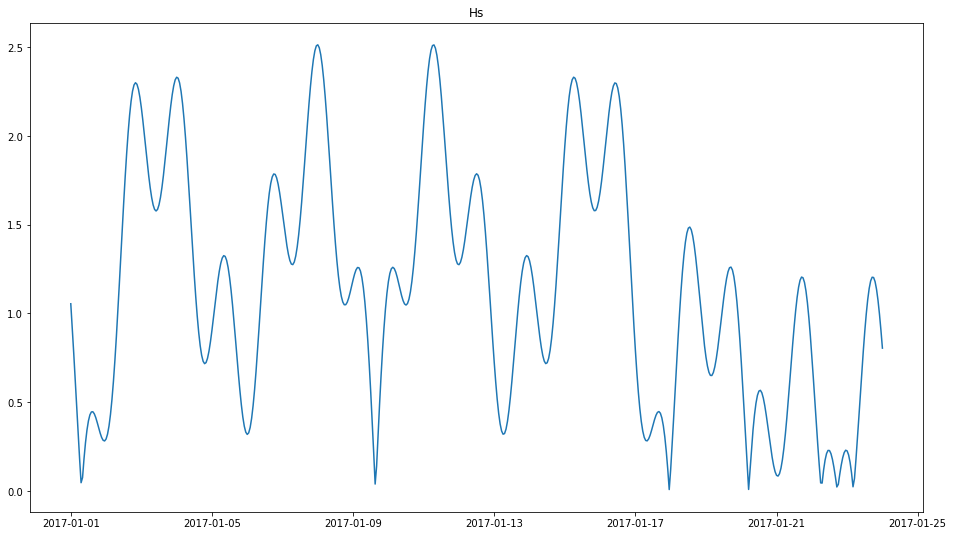

In [3]:
df_meteo = make_meteo_df()
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16,9)
ax.set_title("Hs")
bool_plot = (df_meteo.index <=dt.datetime(2017, 1, 24)) & (df_meteo.index >= dt.datetime(2017, 1, 1))
ax.plot(df_meteo.index[bool_plot], df_meteo.loc[bool_plot, "Hs"])
fig1 = get_gantt_chart(obj)

#### Get critical path log and dependencies

In [4]:
my_cp_log = CpLog(obj, act)
my_cp_log.get_dependencies()
my_cp_log.mark_critical_activities()
#my_cp_log.make_gantt_mpl()
my_cp_log.make_gantt_plotly()

-- total elapsed time 2.8471734523773193 seconds


### Full critical log and dependencies output
If one is interested, the logging and the dependencies as used for critical path determination can be shown.

In [5]:
print(my_cp_log.all_cp_dependencies)
my_cp_log.cp_log.head()

[('cp_activity_653', 'cp_activity_753'), ('cp_activity_467', 'cp_activity_168'), ('cp_activity_334', 'cp_activity_484'), ('cp_activity_458', 'cp_activity_159'), ('cp_activity_780', 'cp_activity_679'), ('cp_activity_486', 'cp_activity_187'), ('cp_activity_399', 'cp_activity_552'), ('cp_activity_466', 'cp_activity_771'), ('cp_activity_385', 'cp_activity_538'), ('cp_activity_649', 'cp_activity_749'), ('cp_activity_368', 'cp_activity_520'), ('cp_activity_97', 'cp_activity_396'), ('cp_activity_476', 'cp_activity_177'), ('cp_activity_159', 'cp_activity_9'), ('cp_activity_383', 'cp_activity_535'), ('cp_activity_798', 'cp_activity_698'), ('cp_activity_535', 'cp_activity_234'), ('cp_activity_631', 'cp_activity_732'), ('cp_activity_250', 'cp_activity_101'), ('cp_activity_550', 'cp_activity_248'), ('cp_activity_247', 'cp_activity_98'), ('cp_activity_778', 'cp_activity_677'), ('cp_activity_323', 'cp_activity_473'), ('cp_activity_32', 'cp_activity_635'), ('cp_activity_495', 'cp_activity_196'), ('cp

,Activity,ActivityID,SimulationObject,start_time,state,duration,end_time,cp_activity_id,is_critical
0,vessel01 loading,e976a01d-3bd0-4746-84b5-7736ed58ed38,from_site,2016-12-31 23:00:00,ACTIVE,0 days 01:00:00,2017-01-01 00:00:00.000000,cp_activity_1,True
1,vessel01 loading,e976a01d-3bd0-4746-84b5-7736ed58ed38,vessel01,2016-12-31 23:00:00,ACTIVE,0 days 01:00:00,2017-01-01 00:00:00.000000,cp_activity_1,True
2,vessel02 loading,679a1f13-1fef-41c2-8fe3-89ca43ee7219,from_site,2017-01-01 00:00:00,ACTIVE,0 days 01:00:00,2017-01-01 01:00:00.000000,cp_activity_604,False
3,vessel01 sailing full,50a94fb5-23e4-41a3-9c14-db64209d79f2,vessel01,2017-01-01 00:00:00,ACTIVE,0 days 00:15:42.824591,2017-01-01 00:15:42.824591,cp_activity_301,True
4,vessel02 loading,679a1f13-1fef-41c2-8fe3-89ca43ee7219,vessel02,2017-01-01 00:00:00,ACTIVE,0 days 01:00:00,2017-01-01 01:00:00.000000,cp_activity_604,False
